In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from scipy.stats import ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.stats import randint, uniform

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold, GridSearchCV
from sklearn import metrics, tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [4]:
# Loading the data
data = pd.read_csv("D:\\Downloads\\Datasets in Use\\breast cancer\\data.csv", index_col=False)

In [5]:
# Looking at the top five rows of the data
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [6]:
# Looking at each and every columns of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
#feature mapping for 'diagnosis' feature
#M as 1 and B as 0
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [9]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [10]:
data.describe()

id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min     143.500000         0.052630          0.019380        0.000000   
25%     420.300000         0.086370          0.064920        0.029560   
50%     551.100000         0.095870          0.092630        0.061540   
75%     782.700000         0.105300          0.130400        0.130700   
max    2501.000000         0.163400          0.345400        0.426800   

       concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count           569.000000  ...    569.000000     569.000000       569.000000   
mean              0.048919  ...     16.269190      25.677223       107.261213   
std               0.038803  ...      4.833242       6.146258        33.602542   
min               0.000000  ...      7.930000      12.020000        50.410000   
25%               0.020310  ...     13.010000      21.080000        84.110000   
50%               0.033500  ...     14.970000      25.410000        97.660000   
75%               0.074000  ...     18.790000      29.720000       125.400000   
max               0.201200  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 32 columns]

In [68]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
continuous_variables = [x for x in data.columns if x not in ['id', 'diagnosis']]

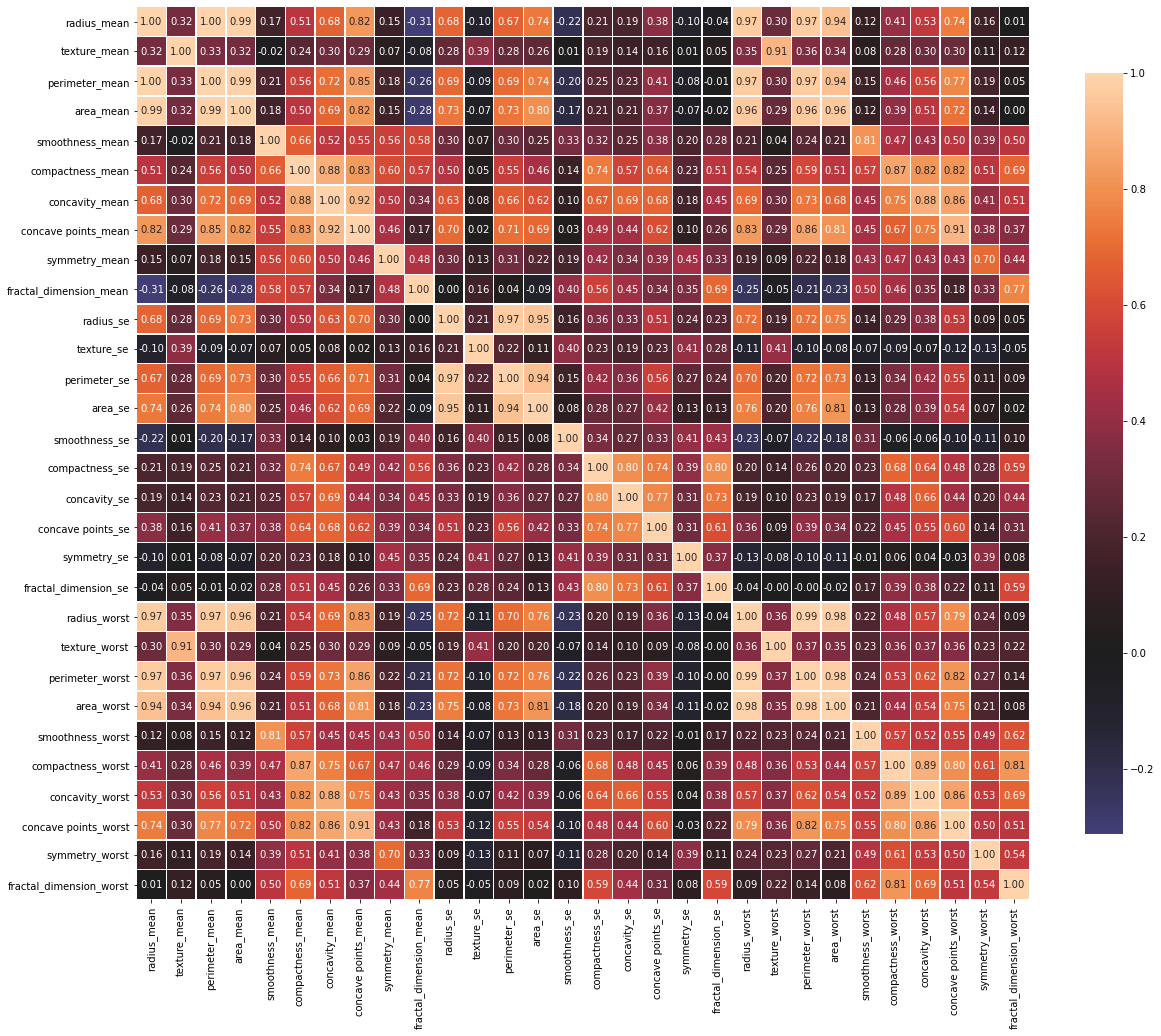

In [14]:
def correlation_heatmap(x):
    correlations = x.corr()
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
correlation_heatmap(data[continuous_variables])

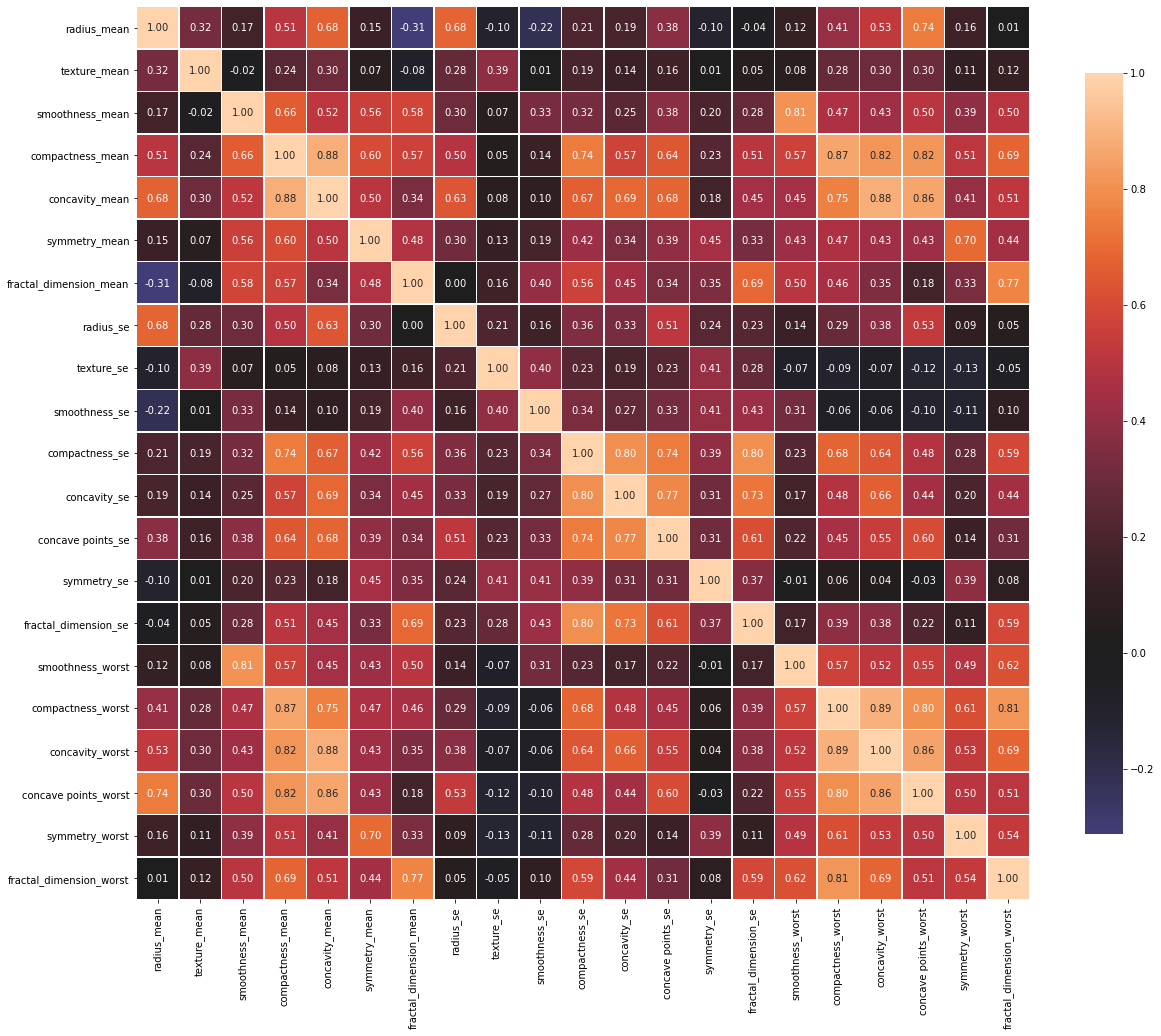

In [15]:
# Removing nine features due to higher (more than 0.9) correlation with other features
continuous_variables = [x for x in continuous_variables if x not in ['perimeter_mean','area_mean','radius_worst',
                                                                     'perimeter_worst','area_worst', 'texture_worst',
                                                                     'concave points_mean', 'perimeter_se', 'area_se']]
correlation_heatmap(data[continuous_variables])

<AxesSubplot:xlabel='fractal_dimension_worst'>

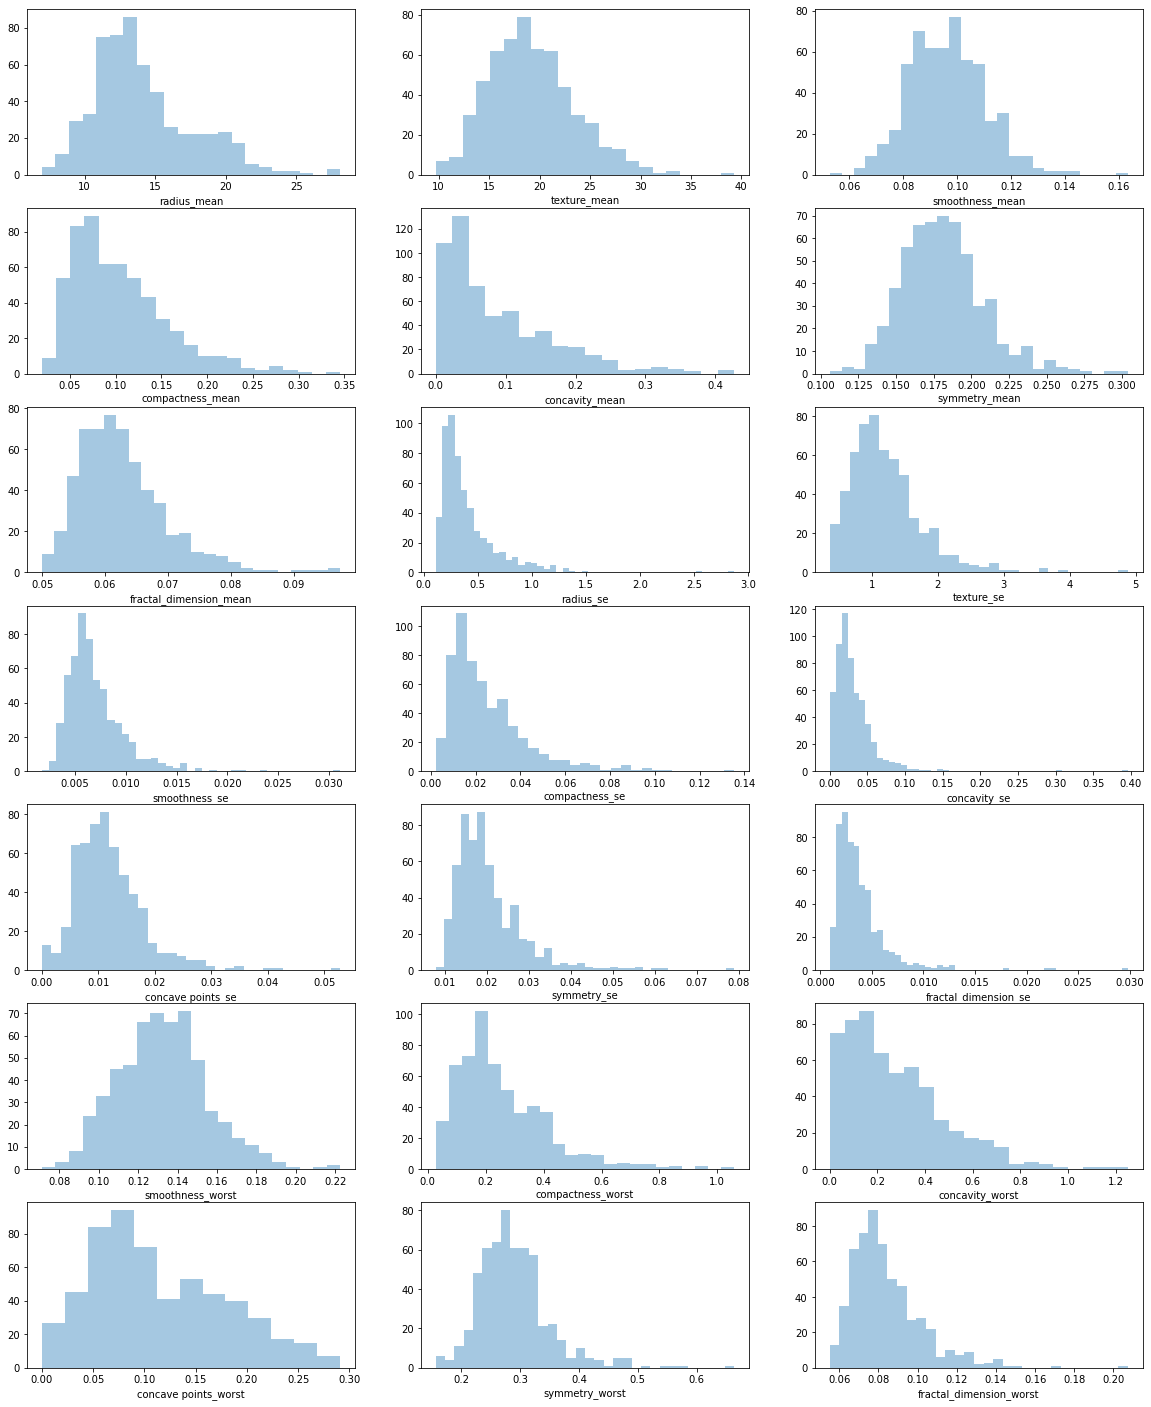

In [40]:
fig, output = plt.subplots(7, 3, figsize=(20,25))
sns.distplot(data['radius_mean'], kde=False, ax=output[0,0])
sns.distplot(data['texture_mean'], kde=False, ax=output[0,1])
sns.distplot(data['smoothness_mean'], kde=False, ax=output[0,2])
sns.distplot(data['compactness_mean'], kde=False, ax=output[1,0])
sns.distplot(data['concavity_mean'], kde=False, ax=output[1,1])
sns.distplot(data['symmetry_mean'], kde=False, ax=output[1,2])
sns.distplot(data['fractal_dimension_mean'], kde=False, ax=output[2,0])
sns.distplot(data['radius_se'], kde=False, ax=output[2,1])
sns.distplot(data['texture_se'], kde=False, ax=output[2,2])
sns.distplot(data['smoothness_se'], kde=False, ax=output[3,0])
sns.distplot(data['compactness_se'], kde=False, ax=output[3,1])
sns.distplot(data['concavity_se'], kde=False, ax=output[3,2])
sns.distplot(data['concave points_se'], kde=False, ax=output[4,0])
sns.distplot(data['symmetry_se'], kde=False, ax=output[4,1])
sns.distplot(data['fractal_dimension_se'], kde=False, ax=output[4,2])
sns.distplot(data['smoothness_worst'], kde=False, ax=output[5,0])
sns.distplot(data['compactness_worst'], kde=False, ax=output[5,1])
sns.distplot(data['concavity_worst'], kde=False, ax=output[5,2])
sns.distplot(data['concave points_worst'], kde=False, ax=output[6,0])
sns.distplot(data['symmetry_worst'], kde=False, ax=output[6,1])
sns.distplot(data['fractal_dimension_worst'], kde=False, ax=output[6,2])

<AxesSubplot:xlabel='diagnosis', ylabel='fractal_dimension_worst'>

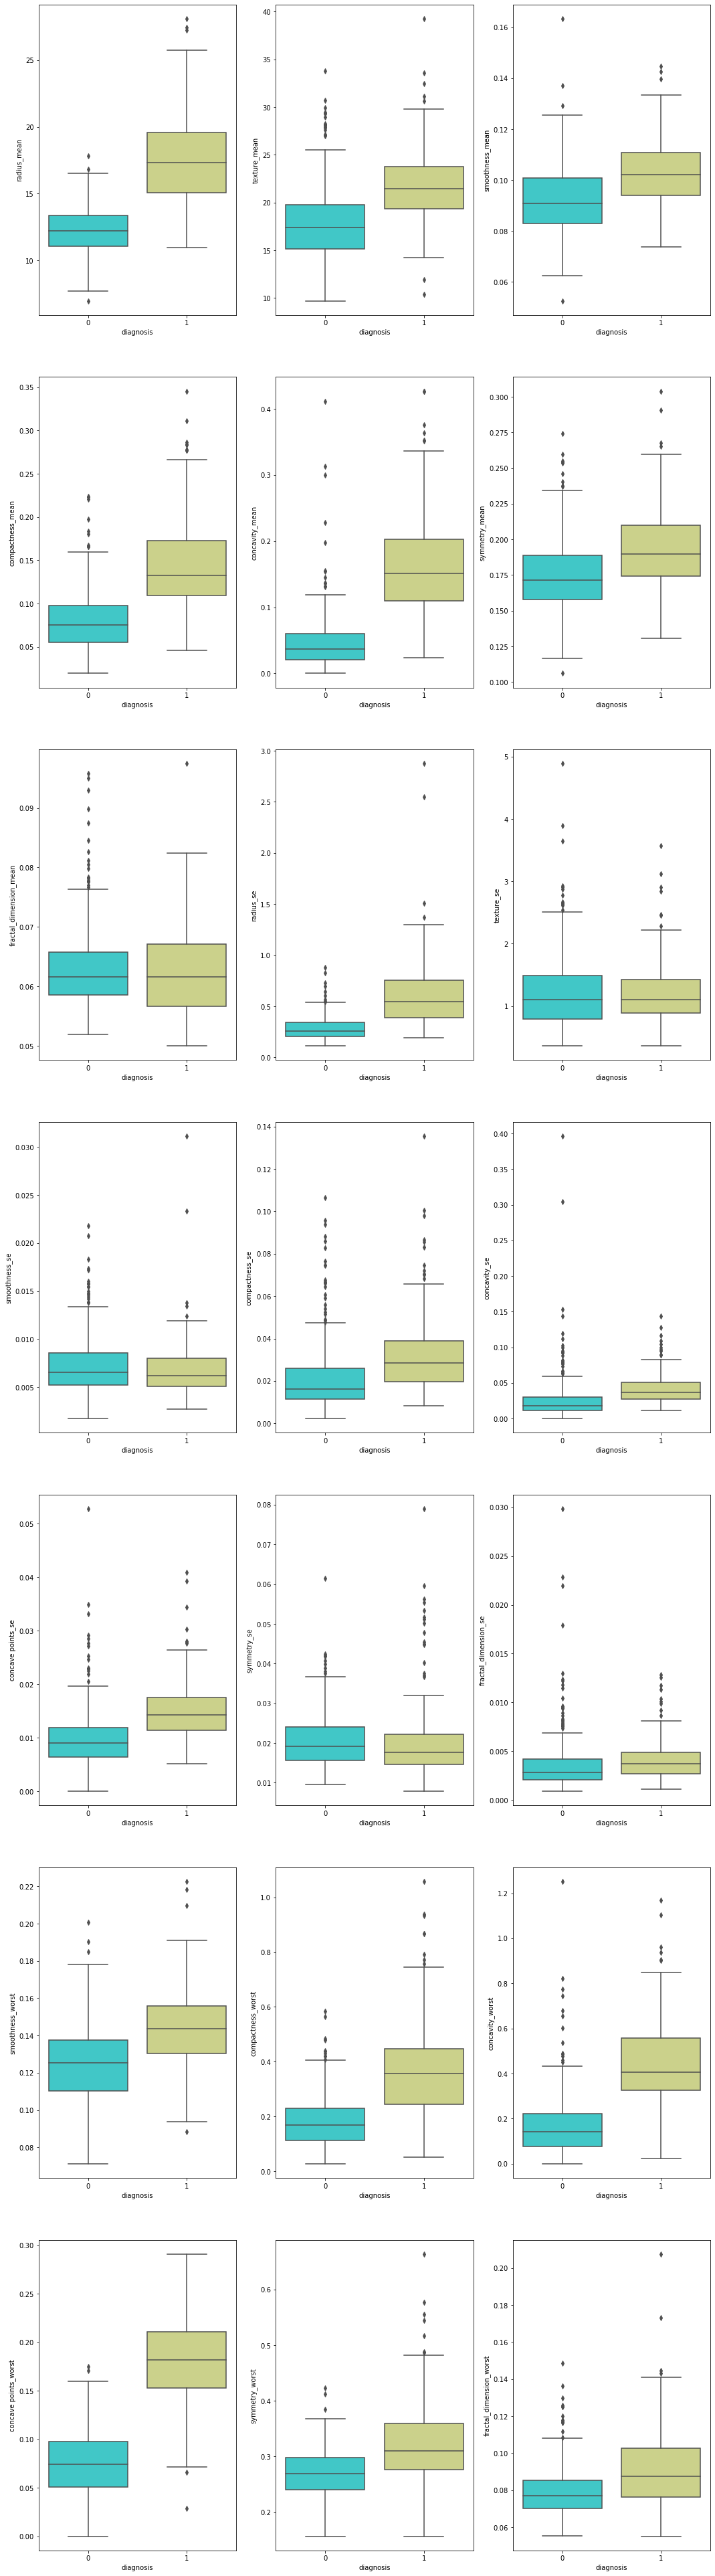

In [41]:
fig, output = plt.subplots(7, 3, figsize=(18,70))
sns.boxplot(x='diagnosis', y='radius_mean', data=data, palette="rainbow", ax=output[0,0])
sns.boxplot(x='diagnosis', y='texture_mean', data=data, palette="rainbow", ax=output[0,1])
sns.boxplot(x='diagnosis', y='smoothness_mean', data=data, palette="rainbow", ax=output[0,2])
sns.boxplot(x='diagnosis', y='compactness_mean', data=data, palette="rainbow", ax=output[1,0])
sns.boxplot(x='diagnosis', y='concavity_mean', data=data, palette="rainbow", ax=output[1,1])
sns.boxplot(x='diagnosis', y='symmetry_mean', data=data, palette="rainbow", ax=output[1,2])
sns.boxplot(x='diagnosis', y='fractal_dimension_mean', data=data, palette="rainbow", ax=output[2,0])
sns.boxplot(x='diagnosis', y='radius_se', data=data, palette="rainbow", ax=output[2,1])
sns.boxplot(x='diagnosis', y='texture_se', data=data, palette="rainbow", ax=output[2,2])
sns.boxplot(x='diagnosis', y='smoothness_se', data=data, palette="rainbow", ax=output[3,0])
sns.boxplot(x='diagnosis', y='compactness_se', data=data, palette="rainbow", ax=output[3,1])
sns.boxplot(x='diagnosis', y='concavity_se', data=data, palette="rainbow", ax=output[3,2])
sns.boxplot(x='diagnosis', y='concave points_se', data=data, palette="rainbow", ax=output[4,0])
sns.boxplot(x='diagnosis', y='symmetry_se', data=data, palette="rainbow", ax=output[4,1])
sns.boxplot(x='diagnosis', y='fractal_dimension_se', data=data, palette="rainbow", ax=output[4,2])
sns.boxplot(x='diagnosis', y='smoothness_worst', data=data, palette="rainbow", ax=output[5,0])
sns.boxplot(x='diagnosis', y='compactness_worst', data=data, palette="rainbow", ax=output[5,1])
sns.boxplot(x='diagnosis', y='concavity_worst', data=data, palette="rainbow", ax=output[5,2])
sns.boxplot(x='diagnosis', y='concave points_worst', data=data, palette="rainbow", ax=output[6,0])
sns.boxplot(x='diagnosis', y='symmetry_worst', data=data, palette="rainbow", ax=output[6,1])
sns.boxplot(x='diagnosis', y='fractal_dimension_worst', data=data, palette="rainbow", ax=output[6,2])

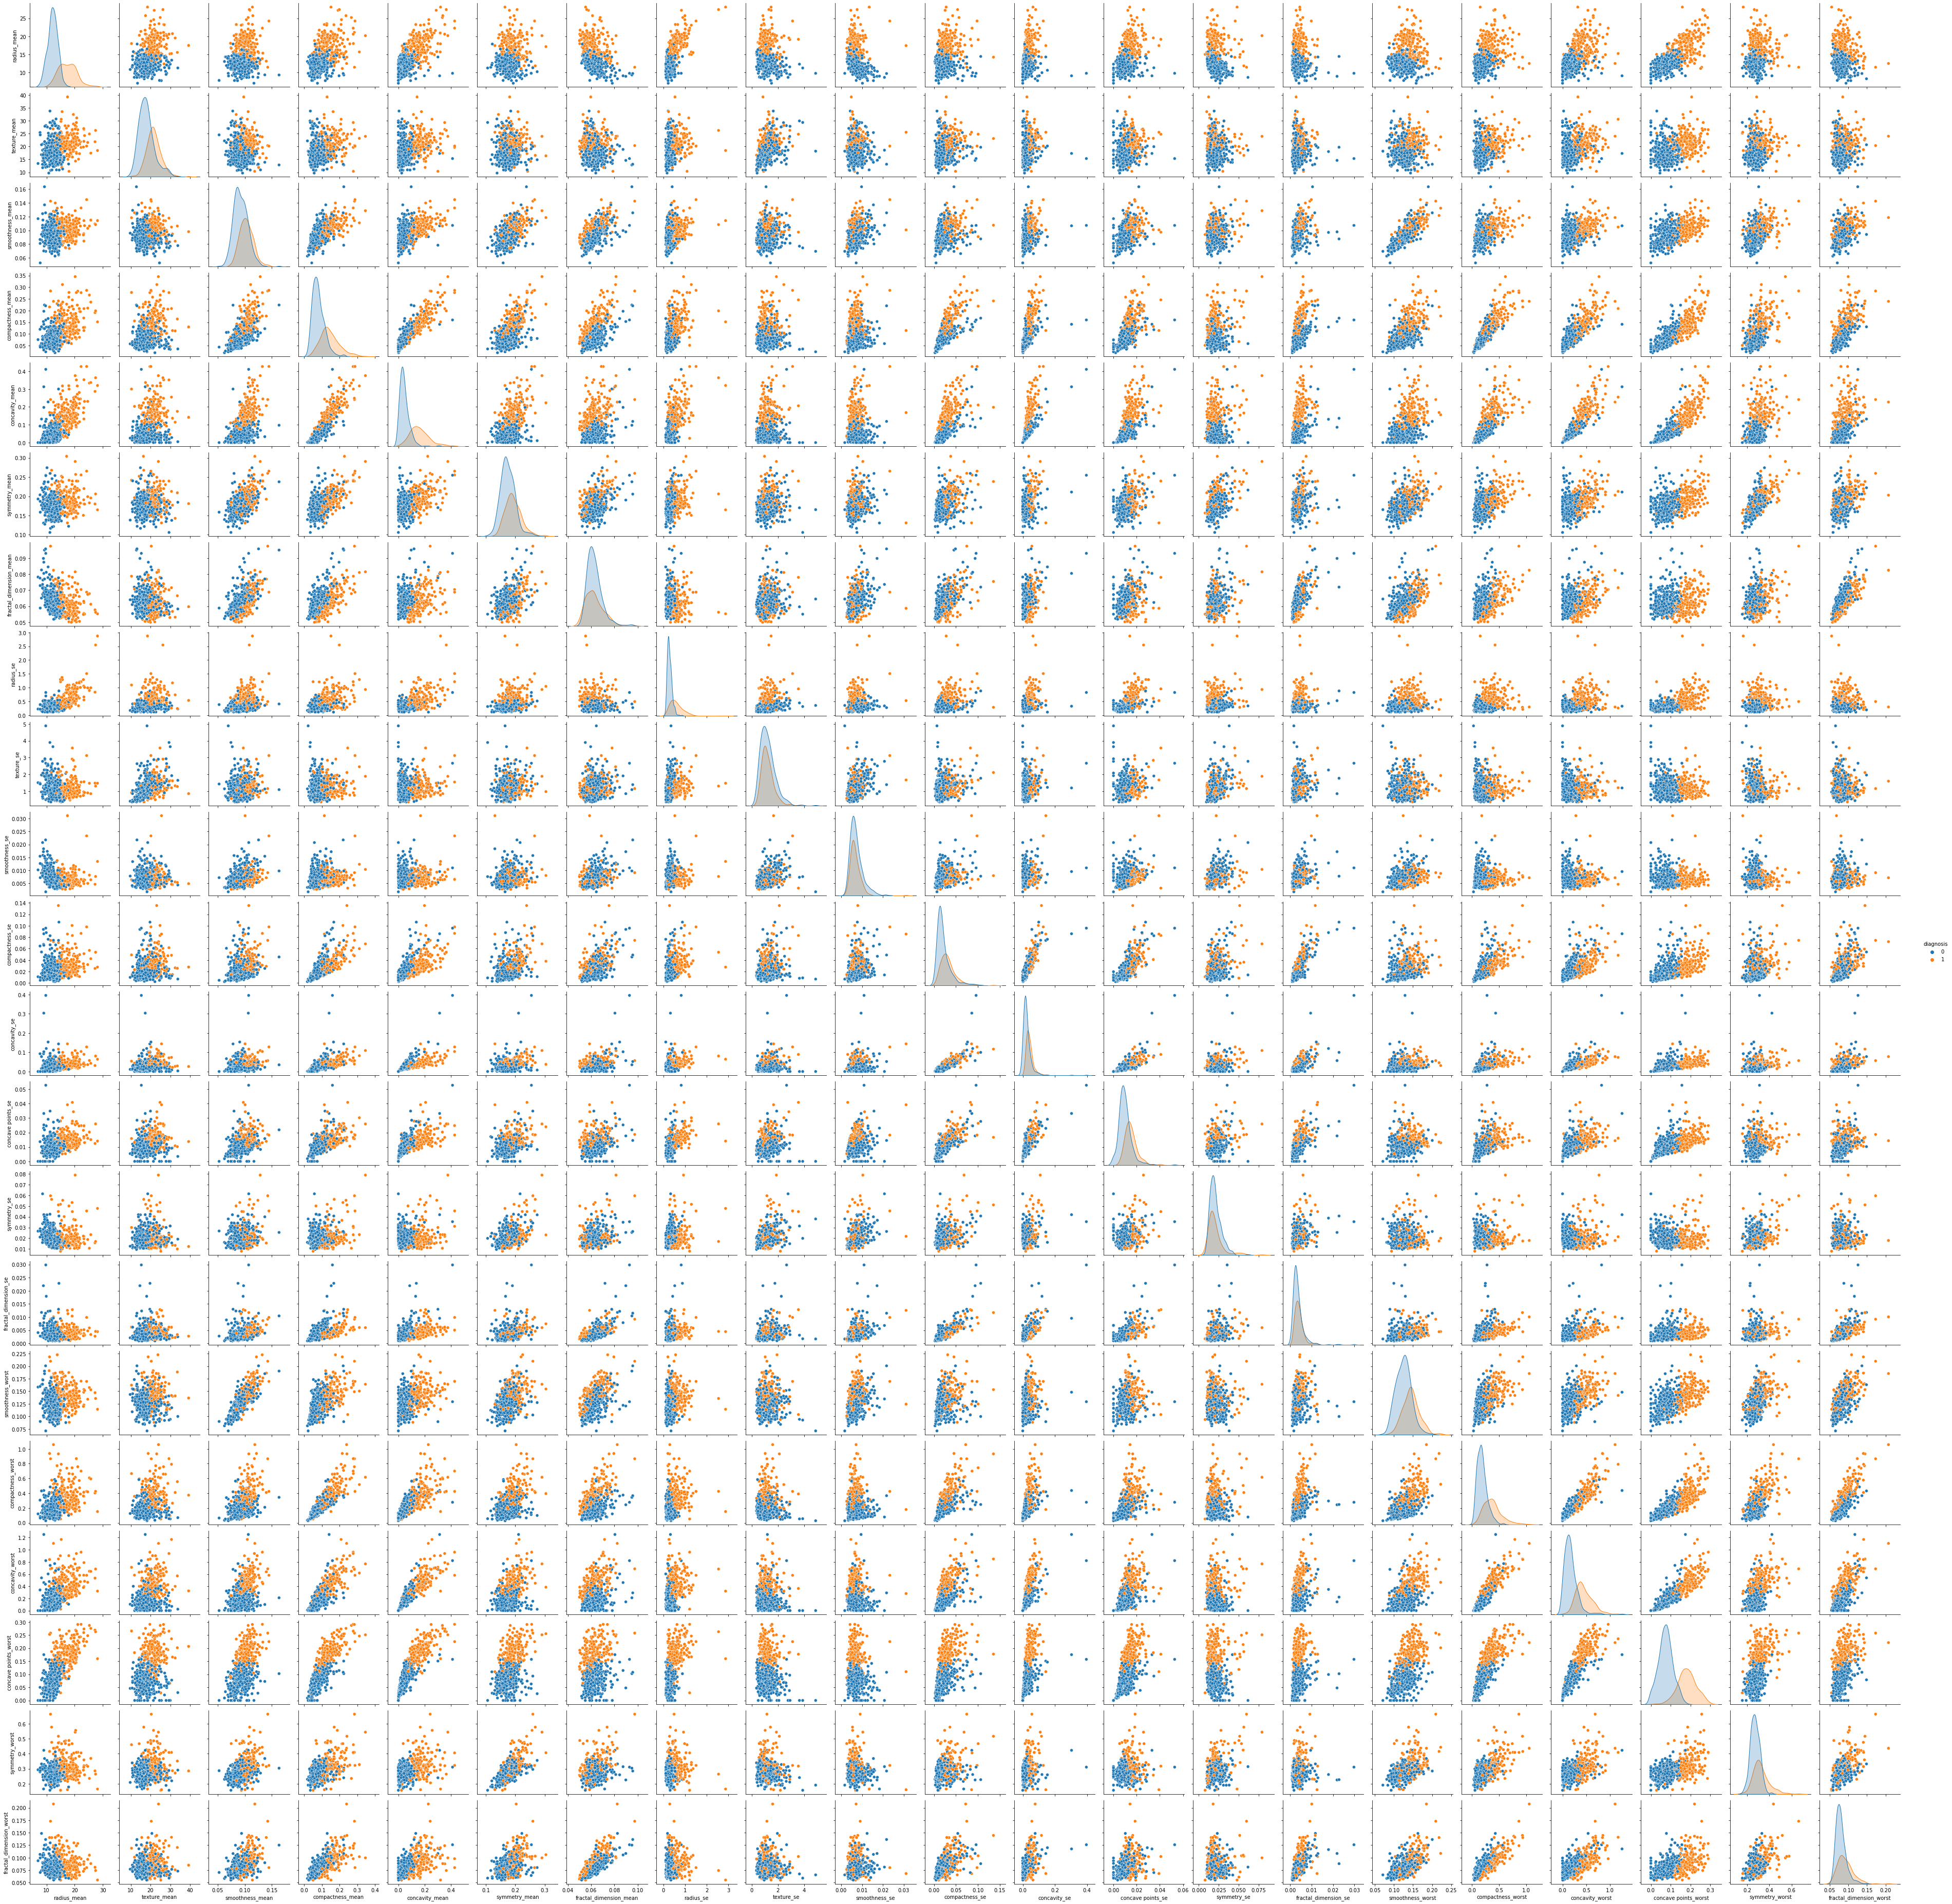

In [38]:
sns.pairplot(data, hue = 'diagnosis', vars = continuous_variables)

In [16]:
X = data[continuous_variables]
Y = data['diagnosis']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=13)

In [18]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train[continuous_variables])
X_train[continuous_variables] = scaler.transform(X_train[continuous_variables])
X_test[continuous_variables] = scaler.transform(X_test[continuous_variables])

In [19]:
X_train.describe()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
count   398.000000    398.000000       398.000000        398.000000   
mean      0.348635      0.421052         0.395246          0.262130   
std       0.174523      0.180957         0.129450          0.165250   
min       0.000000      0.000000         0.000000          0.000000   
25%       0.229047      0.293497         0.299833          0.134187   
50%       0.308675      0.403998         0.391126          0.231872   
75%       0.445668      0.526582         0.479778          0.341068   
max       1.000000      1.000000         1.000000          1.000000   

       concavity_mean  symmetry_mean  fractal_dimension_mean   radius_se  \
count      398.000000     398.000000              398.000000  398.000000   
mean         0.210959       0.332921                0.271731    0.119883   
std          0.193003       0.148815                0.149034    0.109536   
min          0.000000       0.000000                0.000000    0.000000   
25%          0.066311       0.222466                0.166123    0.048477   
50%          0.146447       0.320822                0.247789    0.087047   
75%          0.317190       0.413288                0.340143    0.157846   
max          1.000000       1.000000                1.000000    1.000000   

       texture_se  smoothness_se  ...  concavity_se  concave points_se  \
count  398.000000     398.000000  ...    398.000000         398.000000   
mean     0.255824       0.145770  ...      0.080486           0.223340   
std      0.151600       0.101141  ...      0.081301           0.120056   
min      0.000000       0.000000  ...      0.000000           0.000000   
25%      0.143437       0.079635  ...      0.036648           0.142385   
50%      0.225995       0.123763  ...      0.064015           0.206857   
75%      0.339099       0.187765  ...      0.101061           0.271690   
max      1.000000       1.000000  ...      1.000000           1.000000   

       symmetry_se  fractal_dimension_se  smoothness_worst  compactness_worst  \
count   398.000000            398.000000        398.000000         398.000000   
mean      0.177230              0.100305          0.362928           0.214527   
std       0.110735              0.095199          0.165242           0.152073   
min       0.000000              0.000000          0.000000           0.000000   
25%       0.102761              0.047485          0.244606           0.106557   
50%       0.153909              0.079485          0.356208           0.178308   
75%       0.222153              0.124993          0.457375           0.297241   
max       1.000000              1.000000          1.000000           1.000000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       398.000000            398.000000      398.000000   
mean          0.218005              0.395319        0.265985   
std           0.168646              0.231075        0.119485   
min           0.000000              0.000000        0.000000   
25%           0.085323              0.215584        0.185689   
50%           0.179553              0.338814        0.250444   
75%           0.303934              0.553780        0.321506   
max           1.000000              1.000000        1.000000   

       fractal_dimension_worst  
count               398.000000  
mean                  0.189436  
std                   0.117725  
min                   0.000000  
25%                   0.110111  
50%                   0.163453  
75%                   0.243310  
max                   1.000000  

[8 rows x 21 columns]

In [20]:
def plot_pr_recall_curve(y_test, model_pred, model_name, output):
    precision, recall, not_imp = metrics.precision_recall_curve(y_test, model_pred)
    output.plot(recall, precision, marker='.', label=model_name)
    output.set_xlabel('Recall')
    output.set_ylabel('Precision')
    output.set_title('Precision-Recall curve for {}'.format(model_name))
    output.legend()
    return output

def plot_roc_curve(y_test, model_pred, model_name, output):
    fpr, tpr, not_imp = metrics.roc_curve(y_test, model_pred)
    output.plot(fpr, tpr, marker='.', label=model_name)
    output.set_xlabel('False positive Rate')
    output.set_ylabel('True positive Rate')
    output.set_title('ROC curve for {}'.format(model_name))
    output.legend()
    return output

def plot_confusion_matrix(y_test, model_pred, output, normalize=True):
    groups = ['True -ve', 'False +ve', 'False -ve', 'True +ve']
    matrix = metrics.confusion_matrix(y_test, model_pred)
    values = ['{0:0.0f}'.format(value) for value in matrix.flatten()]
    labels = [f'{x1}\n{x2}' for x1, x2 in zip(groups, values)]
    labels = np.asarray(labels).reshape(2,2)
    output = sns.heatmap(matrix, annot=labels, cmap='RdBu', fmt='', ax=output)
    output.set_title('Confusion Matrix')
    output.set_xlabel('Predicted Classes')
    output.set_ylabel('Actual Classes')
    
def display_result(model, x_train, x_test, y_train, y_test, model_name):
    train_prediction = model.predict(x_train)
    print('On training data :')
    print('Recall    : {:0.5f}'.format(metrics.recall_score(y_train, train_prediction)))
    print('Precision : {:0.5f}'.format(metrics.precision_score(y_train, train_prediction)))
    print('Accuracy  : {:0.5f}'.format(metrics.accuracy_score(y_train, train_prediction)))
    print('F1-score  : {:0.5f}'.format(metrics.f1_score(y_train, train_prediction)))
    model_pred = model.predict(x_test)
    print('\nOn test data :')
    print('Recall    : {:0.5f}'.format(metrics.recall_score(y_test, model_pred)))
    print('Precision : {:0.5f}'.format(metrics.precision_score(y_test, model_pred)))
    print('Accuracy  : {:0.5f}'.format(metrics.accuracy_score(y_test, model_pred)))
    print('F1-score  : {:0.5f}\n'.format(metrics.f1_score(y_test, model_pred)))
    y_hat = model.predict_proba(x_test)
    model_probability = y_hat[:,1]
    fig, output = plt.subplots(1, 3, figsize=(15,5))
    precision, recall, not_imp = metrics.precision_recall_curve(y_test, model_pred)
    auc_score = metrics.auc(recall, precision)
    output[0] = plot_pr_recall_curve(y_test, model_probability, model_name, output[0])
    output[0].axvline(x=metrics.recall_score(y_test, model_pred), linestyle='--', c='r')
    output[0].axhline(y=metrics.precision_score(y_test, model_pred), linestyle='--', c='r')
    output[0].set_title('Precision-Recall AUC: {}'.format(np.round(auc_score, 3)), fontsize=12)
    roc_auc_score = metrics.roc_auc_score(y_test, model_probability)
    output[1] = plot_roc_curve(y_test, model_probability, model_name, output=output[1])
    output[1].set_title('ROC AUC: {}'.format(np.round(roc_auc_score, 3)), fontsize=12)
    output[2] = plot_confusion_matrix(y_test, model_pred, output=output[2])

In [48]:
lgr_clf = LogisticRegression(random_state=13)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=13)
lgr_clf_grid = GridSearchCV(estimator=lgr_clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1', error_score=0)
lgr_clf_grid.fit(X_train, Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=13),
             error_score=0, estimator=LogisticRegression(random_state=13),
             n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1')

In [49]:
lgr_clf_grid.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

On training data :
Recall    : 0.96622
Precision : 1.00000
Accuracy  : 0.98744
F1-score  : 0.98282

On test data :
Recall    : 0.92188
Precision : 0.95161
Accuracy  : 0.95322
F1-score  : 0.93651



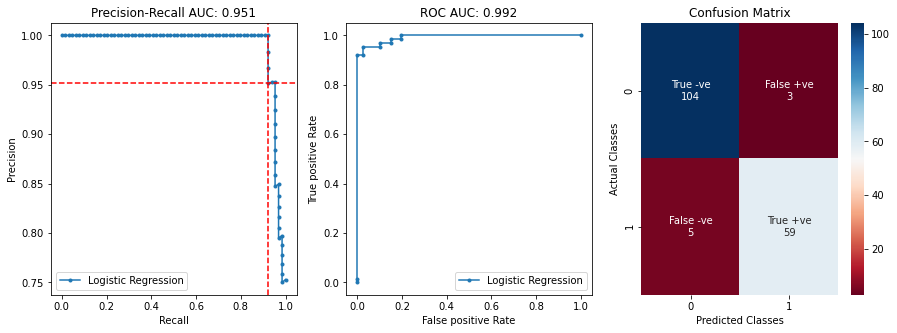

In [50]:
display_result(lgr_clf_grid, X_train, X_test, Y_train, Y_test, 'Logistic Regression')

In [51]:
dcstr_clf = DecisionTreeClassifier(random_state=13)
dcstr_clf_rscv = RandomizedSearchCV(dcstr_clf,
                                   {'max_depth' : randint(2,10),
                                    'max_leaf_nodes' : randint(10,50),
                                    'min_samples_leaf' : randint(2,15)},
                                    scoring = 'f1', random_state=13)
dcstr_clf_rscv.fit(X_train, Y_train)
dcstr_clf_rscv.best_params_

{'max_depth': 8, 'max_leaf_nodes': 44, 'min_samples_leaf': 6}

On training data :
Recall    : 0.95946
Precision : 0.96599
Accuracy  : 0.97236
F1-score  : 0.96271

On test data :
Recall    : 0.90625
Precision : 0.85294
Accuracy  : 0.90643
F1-score  : 0.87879



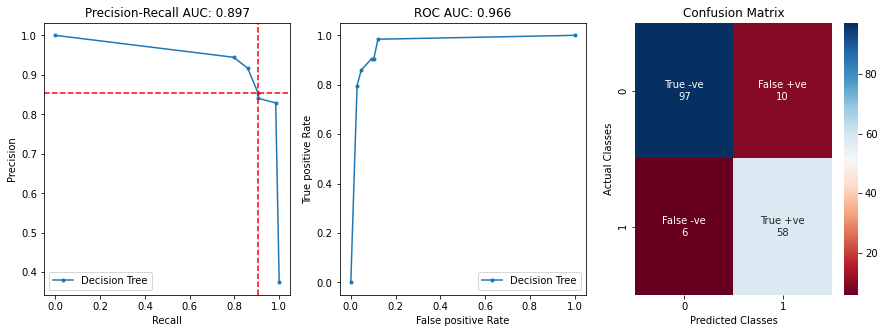

In [52]:
display_result(dcstr_clf_rscv, X_train, X_test, Y_train, Y_test, 'Decision Tree')

In [53]:
rf_clf = RandomForestClassifier(random_state=13)
rf_clf_rscv = RandomizedSearchCV(rf_clf,
                                   {'max_depth' : randint(2,10),
                                    'max_leaf_nodes' : randint(5,50),
                                    'min_samples_leaf' : randint(2,15)},
                                    scoring = 'f1', random_state=13)
rf_clf_rscv.fit(X_train, Y_train)
rf_clf_rscv.best_params_

{'max_depth': 8, 'max_leaf_nodes': 16, 'min_samples_leaf': 3}

On training data :
Recall    : 0.97297
Precision : 1.00000
Accuracy  : 0.98995
F1-score  : 0.98630

On test data :
Recall    : 0.89062
Precision : 0.95000
Accuracy  : 0.94152
F1-score  : 0.91935



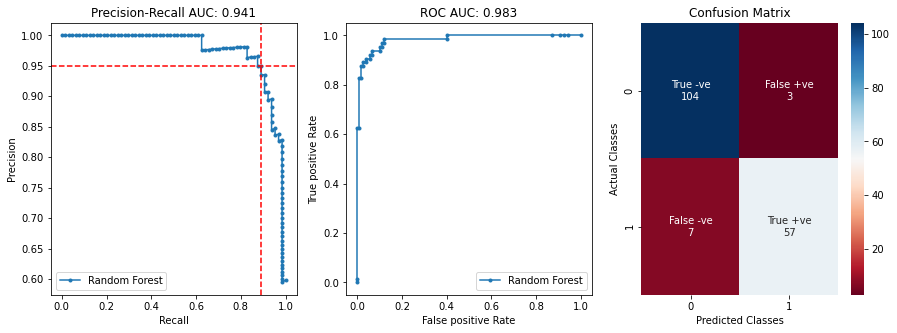

In [54]:
display_result(rf_clf_rscv, X_train, X_test, Y_train, Y_test, 'Random Forest')

On training data :
Recall    : 0.89865
Precision : 0.90476
Accuracy  : 0.92714
F1-score  : 0.90169

On test data :
Recall    : 0.82812
Precision : 0.88333
Accuracy  : 0.89474
F1-score  : 0.85484



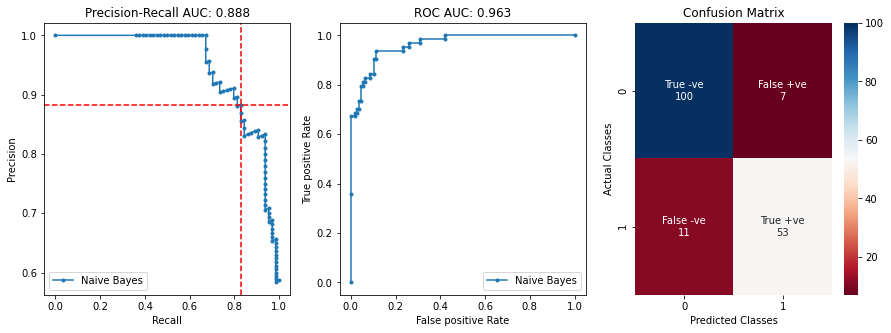

In [69]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, Y_train)
display_result(gnb_clf, X_train, X_test, Y_train, Y_test, 'Naive Bayes')

On training data :
Recall    : 0.90541
Precision : 0.89333
Accuracy  : 0.92462
F1-score  : 0.89933

On test data :
Recall    : 0.82812
Precision : 0.88333
Accuracy  : 0.89474
F1-score  : 0.85484



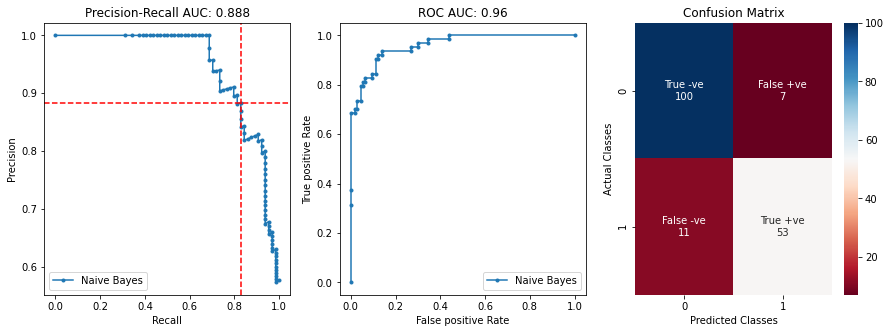

In [55]:
gnb_clf_bag = BaggingClassifier(base_estimator=gnb_clf, oob_score=True, random_state=13)
gnb_clf_bag.fit(X_train, Y_train)
display_result(gnb_clf_bag, X_train, X_test, Y_train, Y_test, 'Naive Bayes')

In [56]:
svc_clf = SVC(probability=True)
svc_clf.fit(X_train, Y_train)
svc_clf.support_vectors_

array([[0.37472479, 0.24297012, 0.5468087 , ..., 0.48006873, 0.31263552,
        0.1947396 ],
       [0.35319732, 0.47539543, 0.33113659, ..., 0.46013746, 0.19101124,
        0.15440115],
       [0.21326875, 0.50746924, 0.31560892, ..., 0.28446735, 0.24916223,
        0.21828676],
       ...,
       [0.57874651, 0.45123023, 0.33041437, ..., 0.44467354, 0.19751626,
        0.0152827 ],
       [0.50437888, 0.5456942 , 0.33727544, ..., 0.52508591, 0.29607727,
        0.12987013],
       [0.51073927, 0.69639719, 0.43305949, ..., 0.37766323, 0.00749064,
        0.08618654]])

On training data :
Recall    : 0.94595
Precision : 0.98592
Accuracy  : 0.97487
F1-score  : 0.96552

On test data :
Recall    : 0.93750
Precision : 0.98361
Accuracy  : 0.97076
F1-score  : 0.96000



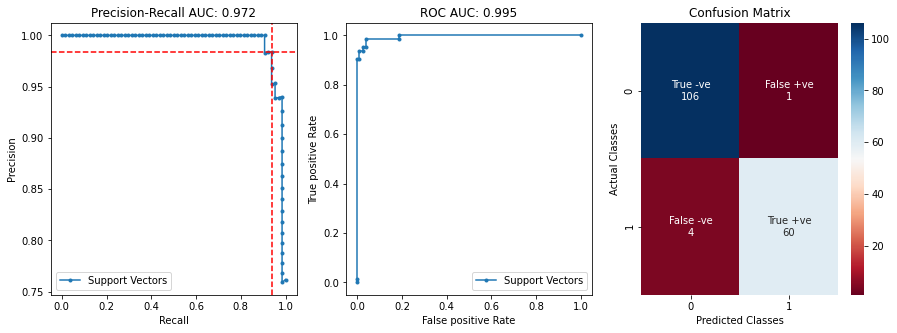

In [57]:
display_result(svc_clf, X_train, X_test, Y_train, Y_test, 'Support Vectors')

On training data :
Recall    : 0.66216
Precision : 1.00000
Accuracy  : 0.87437
F1-score  : 0.79675

On test data :
Recall    : 0.59375
Precision : 1.00000
Accuracy  : 0.84795
F1-score  : 0.74510



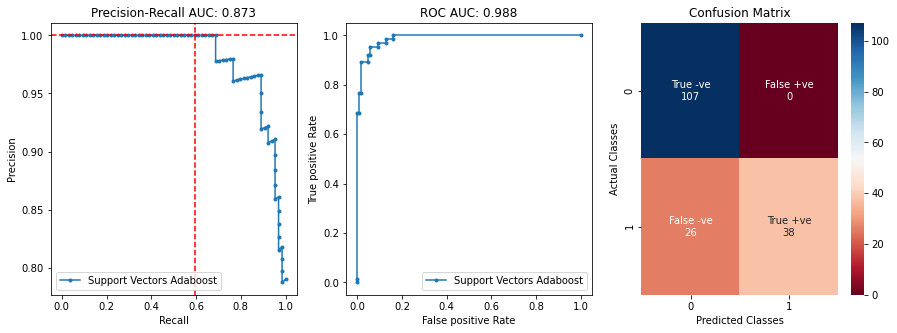

In [58]:
svc_clf_ada = AdaBoostClassifier(base_estimator=svc_clf, random_state=13)
svc_clf_ada.fit(X_train, Y_train)
display_result(svc_clf_ada, X_train, X_test, Y_train, Y_test, 'Support Vectors Adaboost')

In [59]:
knn_clf = KNeighborsClassifier()
knn_clf_rscv = RandomizedSearchCV(knn_clf,
                                   {'n_neighbors' : randint(3,10)},
                                    scoring = 'f1', random_state=13)
knn_clf_rscv.fit(X_train, Y_train)
knn_clf_rscv.best_params_

{'n_neighbors': 5}

On training data :
Recall    : 0.90541
Precision : 0.99259
Accuracy  : 0.96231
F1-score  : 0.94700

On test data :
Recall    : 0.92188
Precision : 0.93651
Accuracy  : 0.94737
F1-score  : 0.92913



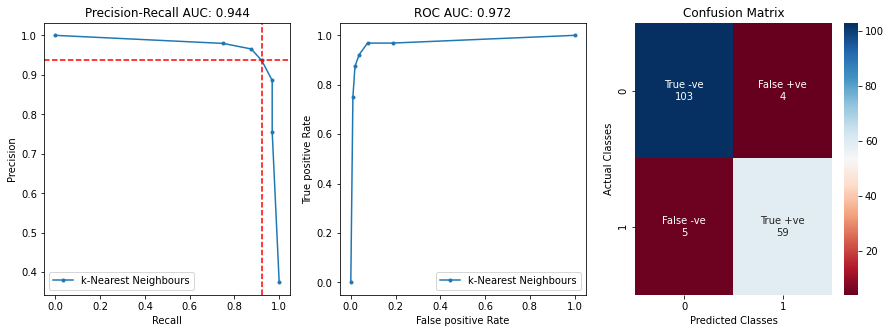

In [60]:
display_result(knn_clf_rscv, X_train, X_test, Y_train, Y_test, 'k-Nearest Neighbours')

In [61]:
classifier = Sequential()
classifier.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu',input_dim=21))
classifier.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=8,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 3,761
Trainable params: 3,761
Non-trainable params: 0
_________________________________________________________________


In [64]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
model = classifier.fit(X_train,Y_train,batch_size=100,epochs=100)

Epoch 1/100
4/4 [==============================] - 2s 3ms/step - loss: 0.7065 - accuracy: 0.6046
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6631 - accuracy: 0.6443
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6482 - accuracy: 0.6961
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6330 - accuracy: 0.7275
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6193 - accuracy: 0.7425
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6127 - accuracy: 0.7315
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5900 - accuracy: 0.7702
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5802 - accuracy: 0.7552
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5760 - accuracy: 0.7562
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5532 - accuracy: 0.7923
Epoch 11/100
4/4 [===========

4/4 [==============================] - 0s 5ms/step - loss: 0.0607 - accuracy: 0.9763
Epoch 84/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0599 - accuracy: 0.9816
Epoch 85/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0625 - accuracy: 0.9873
Epoch 86/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0562 - accuracy: 0.9806
Epoch 87/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0499 - accuracy: 0.9893
Epoch 88/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0575 - accuracy: 0.9893
Epoch 89/100
4/4 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.99 - 0s 5ms/step - loss: 0.0496 - accuracy: 0.9883
Epoch 90/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0567 - accuracy: 0.9786
Epoch 91/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0618 - accuracy: 0.9876
Epoch 92/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0693 - accuracy

In [66]:
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred>0.5)

In [67]:
print('On test data :')
print('Recall    : {:0.5f}'.format(metrics.recall_score(Y_test, Y_pred)))
print('Precision : {:0.5f}'.format(metrics.precision_score(Y_test, Y_pred)))
print('Accuracy  : {:0.5f}'.format(metrics.accuracy_score(Y_test, Y_pred)))
print(metrics.confusion_matrix(Y_test, Y_pred))

On test data :
Recall    : 0.92188
Precision : 0.93651
Accuracy  : 0.94737
[[103   4]
 [  5  59]]
